In [ ]:
!pip install py-agender[gpu] #install cnn first because you need to restart runtime

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Twitter Scrape for Images

##Login-in/Credentials

In [ ]:
#this is the creditentials needed

import re
import io
import csv
import tweepy
from tweepy import OAuthHandler

#http://docs.tweepy.org/en/latest/getting_started.html tweepy 
#https://developer.twitter.com/en/apps/19246249 developer acount


api_key = "kDAso0XJWINkke5jiZUpOPdkv"
api_secret_key = "LdF0rpU8wyV9Nq4mwEqHtNjPRFVfL0nu2Z9qtwQp4SJ71glqx0"
access_token = "1222971872884723712-9EFkYv83D4bYV46KP0zj14Isrhr96k"
access_token_secret = "X0iCh9gJ9dcaC3fGDBtyjIknT4JfZudEs4TxPw1af1z8t"

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

## Creating DataFrame of Tweets 

In [ ]:
!pip install kora -q #used for getting image links: selenium package

     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 


In [ ]:
import tweepy
import csv
import pandas as pd
from kora.selenium import wd
from time import sleep

In [ ]:
#dataframe creation of tweets

####input your credentials here
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth,wait_on_rate_limit=True)


base = []
for tweet in tweepy.Cursor(api.search,q="#ElectoralCollege", #what to queue
                           count=100, #unsure what count does
                           lang="en",
                           since="2020-11-03").items(2000): #items sets limit of tweets
    twitter_name = tweet.user.name
    tweet_description = tweet.text
    num_follower = tweet.user.followers_count
    isVerified_T_F = tweet.user.verified

    #using this for image url
    screen_name = tweet.author.screen_name
    photo_url = "https://twitter.com/" + screen_name + "/photo"
    wd.get(photo_url)
    sleep(2)
    src = wd.find_element_by_xpath("//*[@id='layers']/div[2]/div/div/div/div/div/div[2]/div[2]/div[1]/div/div/div/div/div/img").get_attribute("src")
    base.append((twitter_name,src,tweet_description,num_follower,isVerified_T_F))

df = pd.DataFrame(data = base, columns =["Username", "Profile Pic URL", "Tweet Itself", "Number of Followers", "Is Verified"])


TweepError: ignored

In [ ]:
#only for verified users and those with followers over 10000
####input your credentials here
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth,wait_on_rate_limit=True)

base2 = []
for tweet in tweepy.Cursor(api.search,q="#ElectoralCollege", #what to queue
                           count=100, #unsure what count does
                           lang="en",
                           since="2020-10-20").items(2500000): #items sets limit of tweets #2020-11-03
    if tweet.user.verified == True and tweet.user.followers_count>5000:
      twitter_name = tweet.user.name
      tweet_description = tweet.text
      num_follower = tweet.user.followers_count

      #using this for image url
      screen_name = tweet.author.screen_name
      photo_url = "https://twitter.com/" + screen_name + "/photo"

      wd.get(photo_url)
      sleep(2)
      src = wd.find_element_by_xpath("//*[@id='layers']/div[2]/div/div/div/div/div/div[2]/div[2]/div[1]/div/div/div/div/div/img").get_attribute("src")
      print(src)
      base2.append((twitter_name,src,tweet_description,num_follower))
    else:
      pass

df_verified = pd.DataFrame(data = base2, columns =["Username", "Profile Pic URL", "Tweet Itself", "Number of Followers"])

https://pbs.twimg.com/profile_images/649243858056818688/4YGxmvAW_400x400.png
https://pbs.twimg.com/profile_images/1318384335247052800/eH-doADn_400x400.jpg
https://pbs.twimg.com/profile_images/723542129654509568/XObsEVcy_400x400.jpg
https://pbs.twimg.com/profile_images/1260984641932062720/Zojzy8sc_400x400.jpg
https://pbs.twimg.com/profile_images/649243858056818688/4YGxmvAW_400x400.png
https://pbs.twimg.com/profile_images/1113129778964340736/1BoN-bqo_400x400.jpg
https://pbs.twimg.com/profile_images/1145788281382064128/OSuJ6tTe_400x400.png
https://pbs.twimg.com/profile_images/275426059/SovernCD01_400x400.jpg
https://pbs.twimg.com/profile_images/954141295093698560/9x68uifu_400x400.jpg
https://pbs.twimg.com/profile_images/963519859307892736/OOsXp_hr_400x400.jpg
https://pbs.twimg.com/profile_images/1319446708774981634/m859sapt_400x400.jpg
https://pbs.twimg.com/profile_images/2627006115/8ij5wm7we780t63tv6ek_400x400.png
https://pbs.twimg.com/profile_images/2627006115/8ij5wm7we780t63tv6ek_400x4

##Downloading Images

In [ ]:
cd '/content/drive/MyDrive/QAC239_FinalProject/'

/content/drive/MyDrive/QAC239_FinalProject


In [ ]:
#download the tweet images ---> put them in a folder
import os
import requests

def download(dataframe, dest_folder):
  i = 0
  while i < len(dataframe["Username"]):
    username = dataframe["Username"][i]
    url = dataframe["Profile Pic URL"][i]
    print(url)
    #if not os.path.exists(dest_folder):
    #os.makedirs(dest_folder)  # create folder if it does not exist

    filename = str(username) # im trying to make the filename of the images be the username
    file_path = dest_folder + "/" + filename
    r = requests.get(url, stream=True)
    if r.ok:
        print("saving to", os.path.abspath(file_path))
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 8):
                if chunk:
                    f.write(chunk)
                    f.flush()
                    os.fsync(f.fileno())
    i += 1

download(df, dest_folder="Final_Project_Photos")

https://pbs.twimg.com/profile_images/275426059/SovernCD01_400x400.jpg
saving to /content/drive/My Drive/QAC239_FinalProject/Final_Project_Photos/SovernNation
https://pbs.twimg.com/profile_images/1319446708774981634/m859sapt_400x400.jpg
saving to /content/drive/My Drive/QAC239_FinalProject/Final_Project_Photos/Nellie Gorbea
https://pbs.twimg.com/profile_images/2627006115/8ij5wm7we780t63tv6ek_400x400.png
saving to /content/drive/My Drive/QAC239_FinalProject/Final_Project_Photos/Dan Rea
https://pbs.twimg.com/profile_images/58454226/column_mug_400x400.jpg
saving to /content/drive/My Drive/QAC239_FinalProject/Final_Project_Photos/Herb Jackson
https://pbs.twimg.com/profile_images/1127646656667750400/xIoEiie__400x400.png
saving to /content/drive/My Drive/QAC239_FinalProject/Final_Project_Photos/Andrew Rafferty
https://pbs.twimg.com/profile_images/1044790267558060034/JuvACOyc_400x400.jpg
saving to /content/drive/My Drive/QAC239_FinalProject/Final_Project_Photos/Indira Lakshmanan
https://pbs.tw

#Face Classifier

##Convolutional Neural Network##
Resources: 
*   Github used: https://github.com/yu4u/age-gender-estimation
*   CNN for dummies: https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53




In [ ]:
#!pip install py-agender[gpu]

In [ ]:
from pyagender import PyAgender
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

def Face_Detector(path_to_face):
  img = cv2.imread(path_to_face)
  img_color = img.copy()
  def convertToRGB(img): 
    return cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

  agender = PyAgender() 
  # see available options in __init__() src
  
  faces = agender.detect_genders_ages(cv2.imread(path_to_face))
  print(faces)
  if faces == []:
    return "NA"
  else:
    age = faces[0]["age"]
    num_gender = faces[0]["gender"]

    #uncomment this section if you want to look a the faces recognized location
    #x = faces[0]["left"]
    #y = int(faces[0]["bottom"]- faces[0]["top"])
    #w = faces[0]["width"]
    #h = faces[0]["height"]
    #img_color = cv2.rectangle(img_color,(x,y),(x+w,y+h),(0,0,255),2) 
    #plt.imshow(convertToRGB(img_color))
    if num_gender < 0.5:
      detected_gender = "Male"
    else:
      detected_gender = "Female"
    return [detected_gender, age]

In [ ]:
import os
import pandas as pd
NewFolder = '/content/drive/MyDrive/QAC239_FinalProject/Final_Project_Photos'

def Add_Age_and_Gender(dataframe, path_to_folder_photos):
  dataframe["Gender"] = ""
  dataframe["Age"] = ""
  dataframe["Gender"] = np.nan
  dataframe["Age"]= np.nan
  for file in os.listdir(path_to_folder_photos):
    x = Face_Detector(path_to_folder_photos + "/" + file)
    if x == "NA":
      pass
    else:
      gender = x[0]
      age = x[1]
      filename = str(file)
      i = 0
      while i < len(dataframe["Profile Pic URL"]):
        if dataframe["Username"][i] == filename:
          dataframe["Gender"][i] = x[0]
          dataframe["Age"][i] = x[1]
          i = len(dataframe["Profile Pic URL"])
        else:
          i+=1
  dataframe = dataframe.dropna(how="any")
Add_Age_and_Gender(df,NewFolder)


[{'left': 113, 'top': 66, 'right': 251, 'bottom': 204, 'width': 138, 'height': 138, 'gender': 0.061768897, 'age': 44.55615426694294}]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[{'left': 37, 'top': 104, 'right': 394, 'bottom': 399, 'width': 357, 'height': 295, 'gender': 0.65334207, 'age': 35.62753115876694}]
[{'left': 48, 'top': 6, 'right': 307, 'bottom': 265, 'width': 259, 'height': 259, 'gender': 0.032681048, 'age': 50.97309555729953}, {'left': 15, 'top': 0, 'right': 276, 'bottom': 206, 'width': 261, 'height': 206, 'gender': 0.15350619, 'age': 44.59268828287895}]
[{'left': 0, 'top': 0, 'right': 399, 'bottom': 399, 'width': 399, 'height': 399, 'gender': 0.04299609, 'age': 53.6054526422522}]
[{'left': 44, 'top': 0, 'right': 366, 'bottom': 316, 'width': 322, 'height': 316, 'gender': 0.047038306, 'age': 33.219950167858315}]
[{'left': 31, 'top': 13, 'right': 295, 'bottom': 277, 'width': 264, 'height': 264, 'gender': 0.90198225, 'age': 40.139446030622366}]
[{'left': 0, 'top': 0, 'right': 399, 'bottom': 399, 'width': 399, 'height': 399, 'gender': 0.14820519, 'age': 42.59597788571773}]
[{'left': 117, 'top': 0, 'right': 286, 'bottom': 162, 'width': 169, 'height': 16

#Text Sentiment Analysis

In [ ]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 

def clean_tweet_and_get_tweet_sentiment(tweet): 
  #clean tweet text by removing links, special characters using simple regex statements. 
  tweet = (re.sub(r'@\S+|https?://\S+', '', tweet))

  # create TextBlob object of passed tweet text 
  analysis = TextBlob(tweet) 
  # set sentiment 
  return analysis.sentiment.polarity


In [ ]:
Sentiment_Score = []
Sentiment_Analysis = []

def TSA(dataframe):
  for tweet in dataframe["Tweet Itself"]:
    sentiment_score = clean_tweet_and_get_tweet_sentiment(tweet)
    Sentiment_Score.append(sentiment_score)
    if sentiment_score > 0: 
      Sentiment_Analysis.append('positive')
    elif sentiment_score == 0: 
      Sentiment_Analysis.append('neutral')
    else: 
      Sentiment_Analysis.append('negative')

  dataframe["Sentiment Score"] = Sentiment_Score
  dataframe["Sentiment Analysis"]= Sentiment_Analysis

TSA(df)

#Results#



In [ ]:
#dataframe = 

In [ ]:
import matplotlib.pyplot as plt

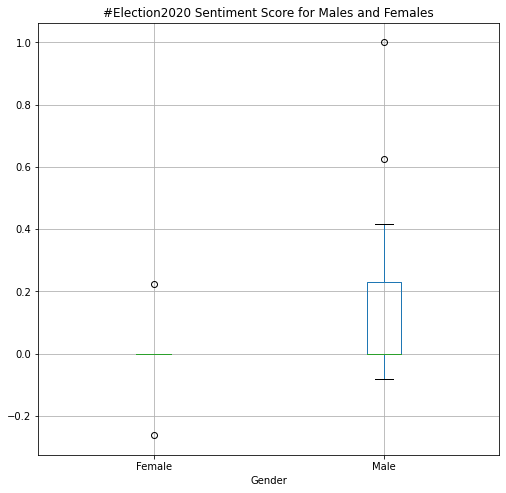

In [ ]:
#boxplot for sentiment scores
dataframe.boxplot(column= "Sentiment Score", by= "Gender", figsize = (8,8)) #either df or df_verified
plt.title("#Election2020 Sentiment Score for Males and Females")
plt.suptitle('') 
plt.show()

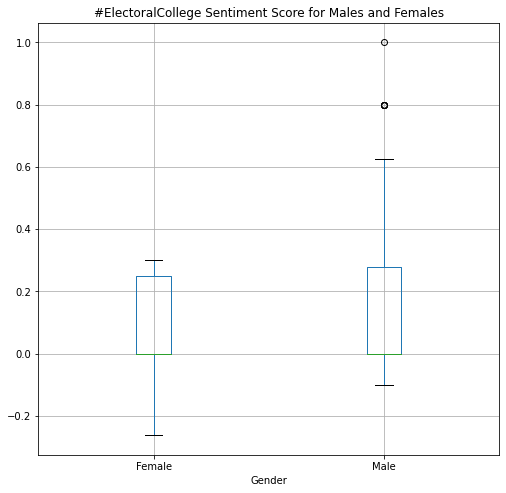

In [ ]:
#boxplot for sentiment scores
dataframe.boxplot(column= "Sentiment Score", by= "Gender", figsize = (8,8)) #either df or df_verified
plt.title("#ElectoralCollege Sentiment Score for Males and Females")
plt.suptitle('') 
plt.show()